# New York City Parking Ticket Analysis

In [237]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline 

##### Preparation: Raw_data loading

In [238]:
year = 2015

In [239]:
str_year = str(year)

In [240]:
filename = "Parking_Violations_Issued_-_Fiscal_Year_" + str_year + ".csv"

In [241]:
filename

'Parking_Violations_Issued_-_Fiscal_Year_2015.csv'

In [232]:
print("loading data --- ", filename, "...")
raw_data = pd.read_csv(filename, low_memory = False)
print("done!")

loading data ---  Parking_Violations_Issued_-_Fiscal_Year_2015.csv ...
done!


In [242]:
start_date = str(year-1) + "-07-01"
end_date = str(year) + "-06-30"

#### 1. Distribution of parking tickets issued over the fiscal year.

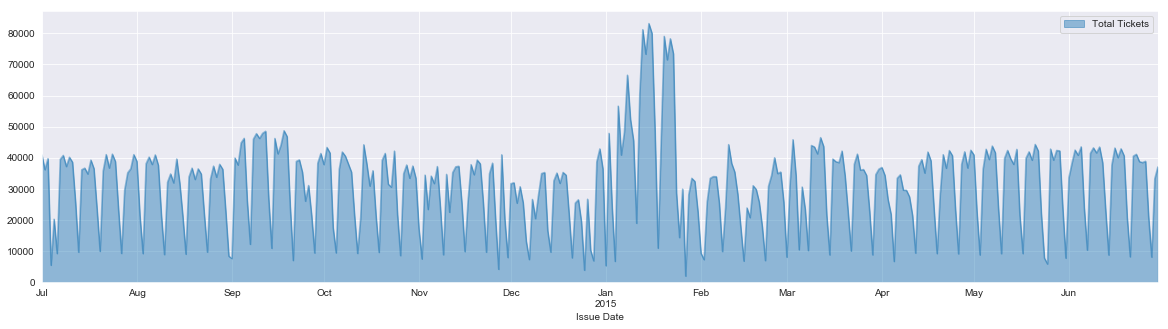

In [243]:
# Select the Columns with 'Issue Date' and 'Summons Number'
Date_SNum = raw_data[['Issue Date','Summons Number']]
# group the data by dates and count the total number of issued tickets on that date
Date_SNum = Date_SNum.groupby('Issue Date', as_index = False).count()
#Grouped data preview
Date_SNum['Issue Date'] = pd.to_datetime(Date_SNum['Issue Date'])
Date_SNum = Date_SNum.set_index('Issue Date')
#Select the tickets issued inside the fisical year range
Date_SNum = Date_SNum.loc[start_date : end_date]
#sort from start_date to end_date
Date_SNum = Date_SNum.sort_index()
#rename the Summons Number to Total Tickets, rename the dataframe too
Date_Total = Date_SNum.rename(columns = {"Summons Number" : "Total Tickets"})

fig1 = Date_Total.plot(kind = 'area', figsize = (20,5), alpha = 0.45, grid = True)

#### 2. Distribution of the traffic Tickets on the Day of Week

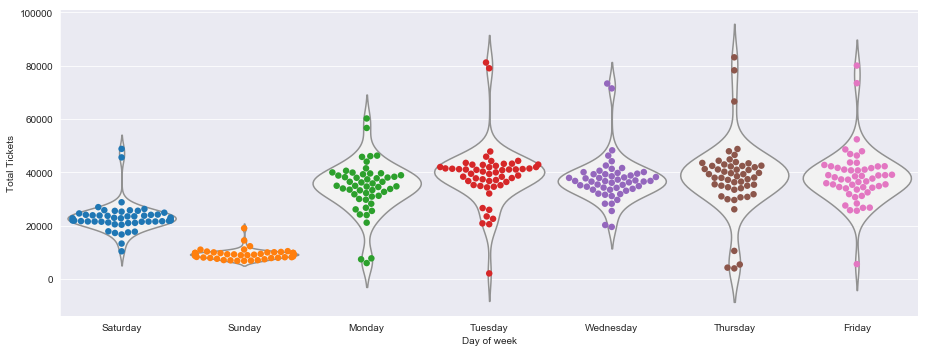

In [244]:
Date_Total["Day of week"] = Date_Total.index.day_name()

#violin plot for the number of tickets gave out on each weekday
fig2 = sns.catplot(x = "Day of week", y = "Total Tickets", data = Date_Total, kind = "violin", height = 5, width = 0.9, aspect = 13/5, order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], scale = "count", inner = None, color = "0.95")
fig2 = sns.swarmplot(x = "Day of week", y = "Total Tickets", data = Date_Total, order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], size = 6.5)

#### 3. Distribution of the traffic Tickets on the different month

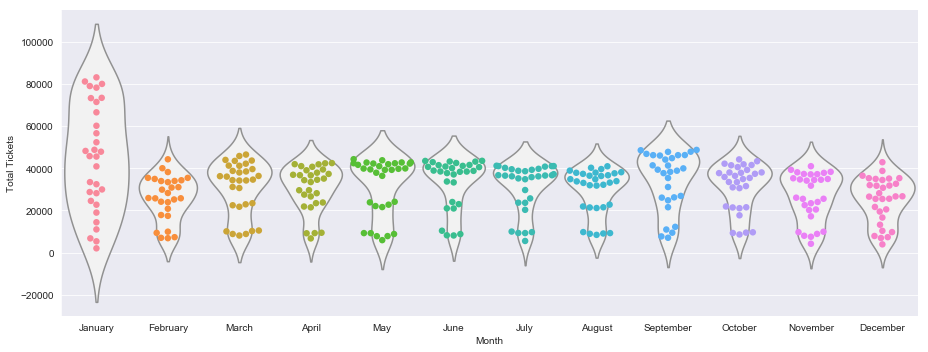

In [245]:
Date_Total["Month"] = Date_Total.index.month_name()

#violin plot for the number of tickets gave out on each weekday
fig3 = sns.catplot(x = "Month", y = "Total Tickets", data = Date_Total, kind = "violin", height = 5, width = 0.9, aspect = 13/5, order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], scale = "count", inner = None, color = "0.95")
fig3 = sns.swarmplot(x = "Month", y = "Total Tickets", data = Date_Total, order = ["January", "February", "March", "April", "May", "June", "July","August","September","October","November","December"], size = 6.5)

#### 4. Tickets given on Plate Types

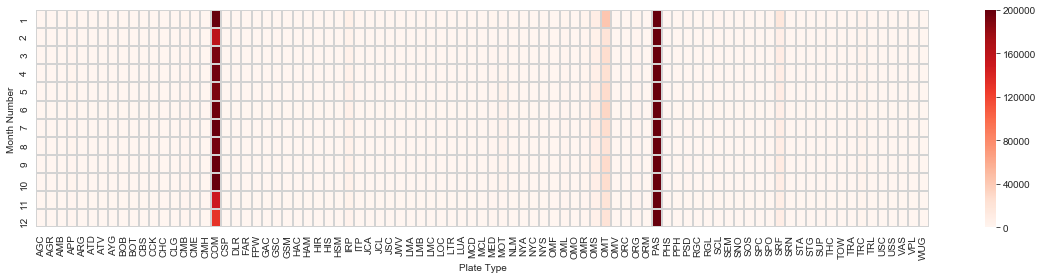

In [246]:
Date_PT_TotalTX = raw_data[['Issue Date','Plate Type','Summons Number']]
# Fill any N/A with number string "N/A"
Date_PT_TotalTX = Date_PT_TotalTX.fillna("not_valid") 
Date_PT_TotalTX = Date_PT_TotalTX.groupby(['Issue Date','Plate Type'], as_index = False).count()
Date_PT_TotalTX['Issue Date'] = pd.to_datetime(Date_PT_TotalTX['Issue Date'])
Date_PT_TotalTX = Date_PT_TotalTX.set_index('Issue Date')
#Select the tickets issued inside the fisical year range
Date_PT_TotalTX = Date_PT_TotalTX.loc[start_date:end_date]
#drop the rows with plate type 999
Date_PT_TotalTX = Date_PT_TotalTX.loc[Date_PT_TotalTX['Plate Type'] != '999']
Date_PT_TotalTX['Month Number'] = Date_PT_TotalTX.index.month
Date_PT_TotalTX = Date_PT_TotalTX.groupby(['Month Number','Plate Type']).sum()
Date_PT_TotalTX = Date_PT_TotalTX.reset_index()
Date_PT_TotalTX = Date_PT_TotalTX.pivot(index='Month Number', columns='Plate Type', values='Summons Number')
Date_PT_TotalTX = Date_PT_TotalTX.fillna(0)

plt.subplots(figsize=(20,4)) 
fig4 = sns.heatmap(Date_PT_TotalTX, vmax = 200000, linewidths = 1, linecolor = 'lightgrey', cmap = "Reds")

#### 4. violation code with Plate Types

Text(0.5, 1.0, 'OMT')

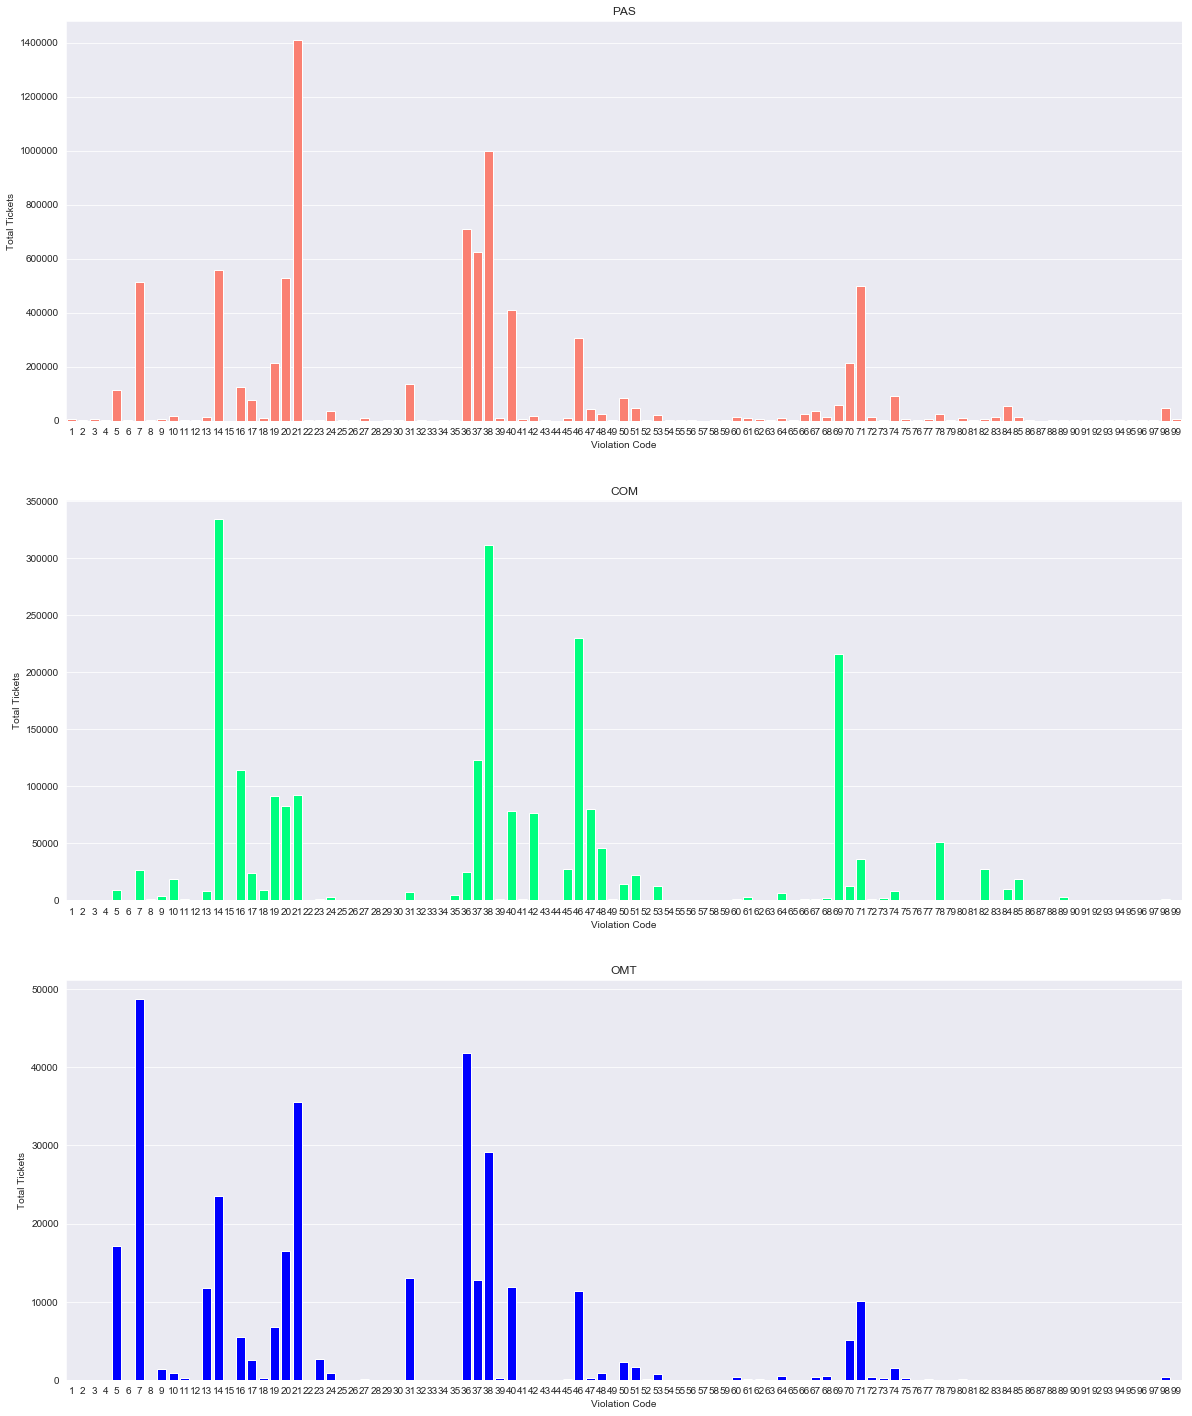

In [247]:
Date_VCode_PT_TotalTX = raw_data[['Issue Date','Violation Code','Plate Type','Summons Number']]
# Fill any N/A with number string "N/A"
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.fillna("not_valid") 
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.groupby(['Issue Date','Plate Type','Violation Code'], as_index = False).count()
Date_VCode_PT_TotalTX['Issue Date'] = pd.to_datetime(Date_VCode_PT_TotalTX['Issue Date'])
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.set_index('Issue Date')
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.loc[start_date:end_date]
Date_VCode_PT_TotalTX = Date_VCode_PT_TotalTX.loc[Date_VCode_PT_TotalTX['Plate Type'] != '999']

VCode_PT_TotalTX = Date_VCode_PT_TotalTX.groupby(['Violation Code', 'Plate Type']).sum().reset_index()
VCode_PT_TotalTX = VCode_PT_TotalTX.fillna(0)
VCode_PT_TotalTX = VCode_PT_TotalTX.rename(columns = {'Summons Number' : 'Total Tickets'})

VCode_PAS_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'PAS']
VCode_COM_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'COM']
VCode_OMT_TotalTX = VCode_PT_TotalTX[VCode_PT_TotalTX['Plate Type'] == 'OMT']

plt.figure(figsize = (20,25))
ax1 = plt.subplot(311)
sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_PAS_TotalTX, color = 'salmon', saturation = 1, ax = ax1, order = list(range(1,100)))
plt.title('PAS',)
ax2 = plt.subplot(312)
sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_COM_TotalTX, color = 'springgreen', saturation = 1, ax = ax2, order = list(range(1,100)))
plt.title('COM')
ax3 = plt.subplot(313)
sns.barplot(x="Violation Code", y="Total Tickets", data=VCode_OMT_TotalTX, color = 'b', saturation = 1, ax = ax3, order = list(range(1,100)))
plt.title('OMT')

#### 5. Precincts Data

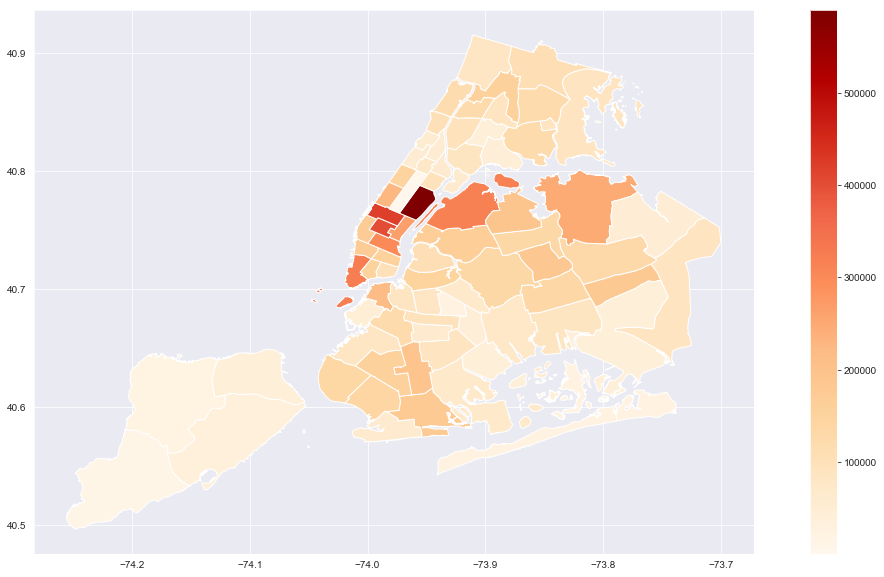

In [248]:
Date_Precinct_TotalTX = raw_data[['Issue Date','Violation Precinct','Summons Number']]
#Group data based on issue date and precinct
Date_Precinct_TotalTX = Date_Precinct_TotalTX.groupby(['Issue Date','Violation Precinct'], as_index = False).count()
Date_Precinct_TotalTX['Issue Date'] = pd.to_datetime(Date_Precinct_TotalTX['Issue Date'])
Date_Precinct_TotalTX = Date_Precinct_TotalTX.set_index('Issue Date')
#locate data within the approporiate fiscal year range
Date_Precinct_TotalTX = Date_Precinct_TotalTX[start_date:end_date]
#Group data base on precinct
Precinct_TotalTX = Date_Precinct_TotalTX.groupby('Violation Precinct').sum()
#remove invalid precinct entries
Precinct_TotalTX = Precinct_TotalTX[1:124]
Precinct_TotalTX = Precinct_TotalTX.drop([2,3,4,8,11,12,15,16,21,27,29,31,35,36,37,38,39,51,53,54,55,56,57,58,59,64,65,74,80,82,85,86,87,89,91,92,93,95,96,97,98,99,116,117,118,119])

#Precinct Heat Map
map_path = "./precinct_map/geo_export_1ac7dc26-ca74-4ae0-8bef-28d6099c5e96.shp"
data = gpd.read_file(map_path)
data = data.set_index('precinct')
data = pd.concat([data,Precinct_TotalTX], axis = 1)
fig, ax = plt.subplots(1, 1, figsize = (20,10))
data.plot(column='Summons Number', legend=True, ax = ax, cmap = 'OrRd')